## Inventories and Dynamic Programming

#### John Stachurski

Fall semester 2018

Attempts to generate $(s, S)$ dynamics in an optimizing model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:
p = 0.4  # Higher p means lower demand

@njit
def ϕ(d):
    return (1 - p)**d * p

@njit
def mx(a):
    return max(a, 0)

d_max = 100

In [3]:
@njit
def bellman_op(v, v_out, σ, β, S, c, k):

    n = len(v)    
    
    for x in range(n):
        # compute the value of not ordering
        vno = 0.0
        for d in range(d_max):
            vno += (min(x, d) + β * v[mx(x-d)]) * ϕ(d)
        # compute the value of ordering
        if x <= (k - 1) * S:
            vo = -c
            for d in range(d_max):
                vo += (min(x, d) + β * v[mx(x-d) + S]) * ϕ(d)
        else:
            vo = -np.inf
            
        # take the max
        v_out[x] = max(vo, vno)
        if vo > vno:
            σ[x] = 1


In [4]:
β = 0.98
S = 100
c = 2
k = 2
n = k * S + 1

In [5]:
v_in = np.ones(n, dtype=int)
v_out = np.ones(n, dtype=int)
σ = np.zeros(n, dtype=int)


In [6]:
i = 0
iter_max = 500
tol = 1e-6
ϵ = tol + 1

while i < iter_max and ϵ > tol:
    bellman_op(v_in, v_out, σ, β, S, c, k)
    ϵ = np.max(np.abs(v_in - v_out))
    v_in[:] = v_out
    i += 1

In [7]:
i

28

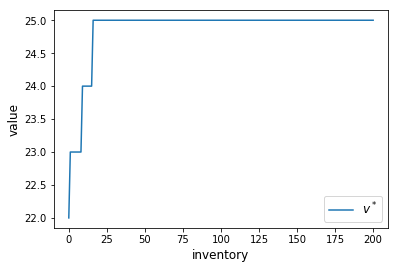

In [8]:
fig, ax = plt.subplots()

ax.plot(np.arange(n), v_out, label="$v^*$")
ax.set_xlabel("inventory", fontsize=12)
ax.set_ylabel("value", fontsize=12)
ax.legend(fontsize=12)
plt.show()

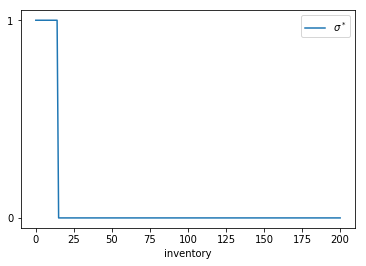

In [9]:
fig, ax = plt.subplots()

ax.plot(np.arange(len(v_out)), σ, label="$\\sigma^*$")
ax.set_xlabel("inventory")

ax.set_yticks((0, 1))

ax.legend()
plt.show()

In [10]:
def simulate(ts_length, x_init=S):
    x = np.empty(ts_length, dtype=int)
    x[0] = x_init
    for t in range(ts_length-1):
        d = np.random.geometric(p)
        x[t+1] = mx(x[t] - d) + S * σ[x[t]]
    return x
    

In [11]:
x = simulate(100)

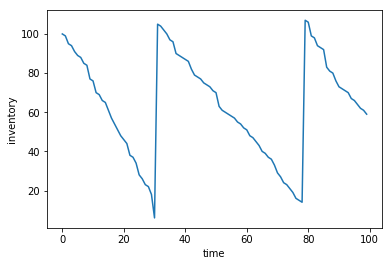

In [12]:
fig, ax = plt.subplots()

ax.plot(x)

ax.set_xlabel("time")
ax.set_ylabel("inventory")

plt.show()